<a href="https://www.kaggle.com/code/rahulkotecha/car-price-regression?scriptVersionId=93952358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car Price Prediction-Regression Problem

Source: https://archive.ics.uci.edu/ml/datasets/Automobile


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

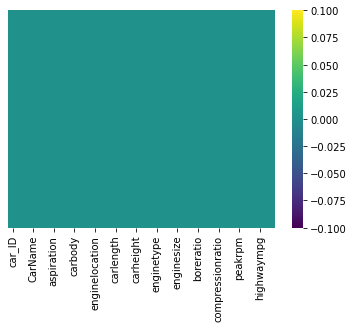

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.memory_usage()

Index                128
car_ID              1640
symboling           1640
CarName             1640
fueltype            1640
aspiration          1640
doornumber          1640
carbody             1640
drivewheel          1640
enginelocation      1640
wheelbase           1640
carlength           1640
carwidth            1640
carheight           1640
curbweight          1640
enginetype          1640
cylindernumber      1640
enginesize          1640
fuelsystem          1640
boreratio           1640
stroke              1640
compressionratio    1640
horsepower          1640
peakrpm             1640
citympg             1640
highwaympg          1640
price               1640
dtype: int64

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.describe(include=["object"])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df.drop(["car_ID"],axis=1,inplace=True)

In [13]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


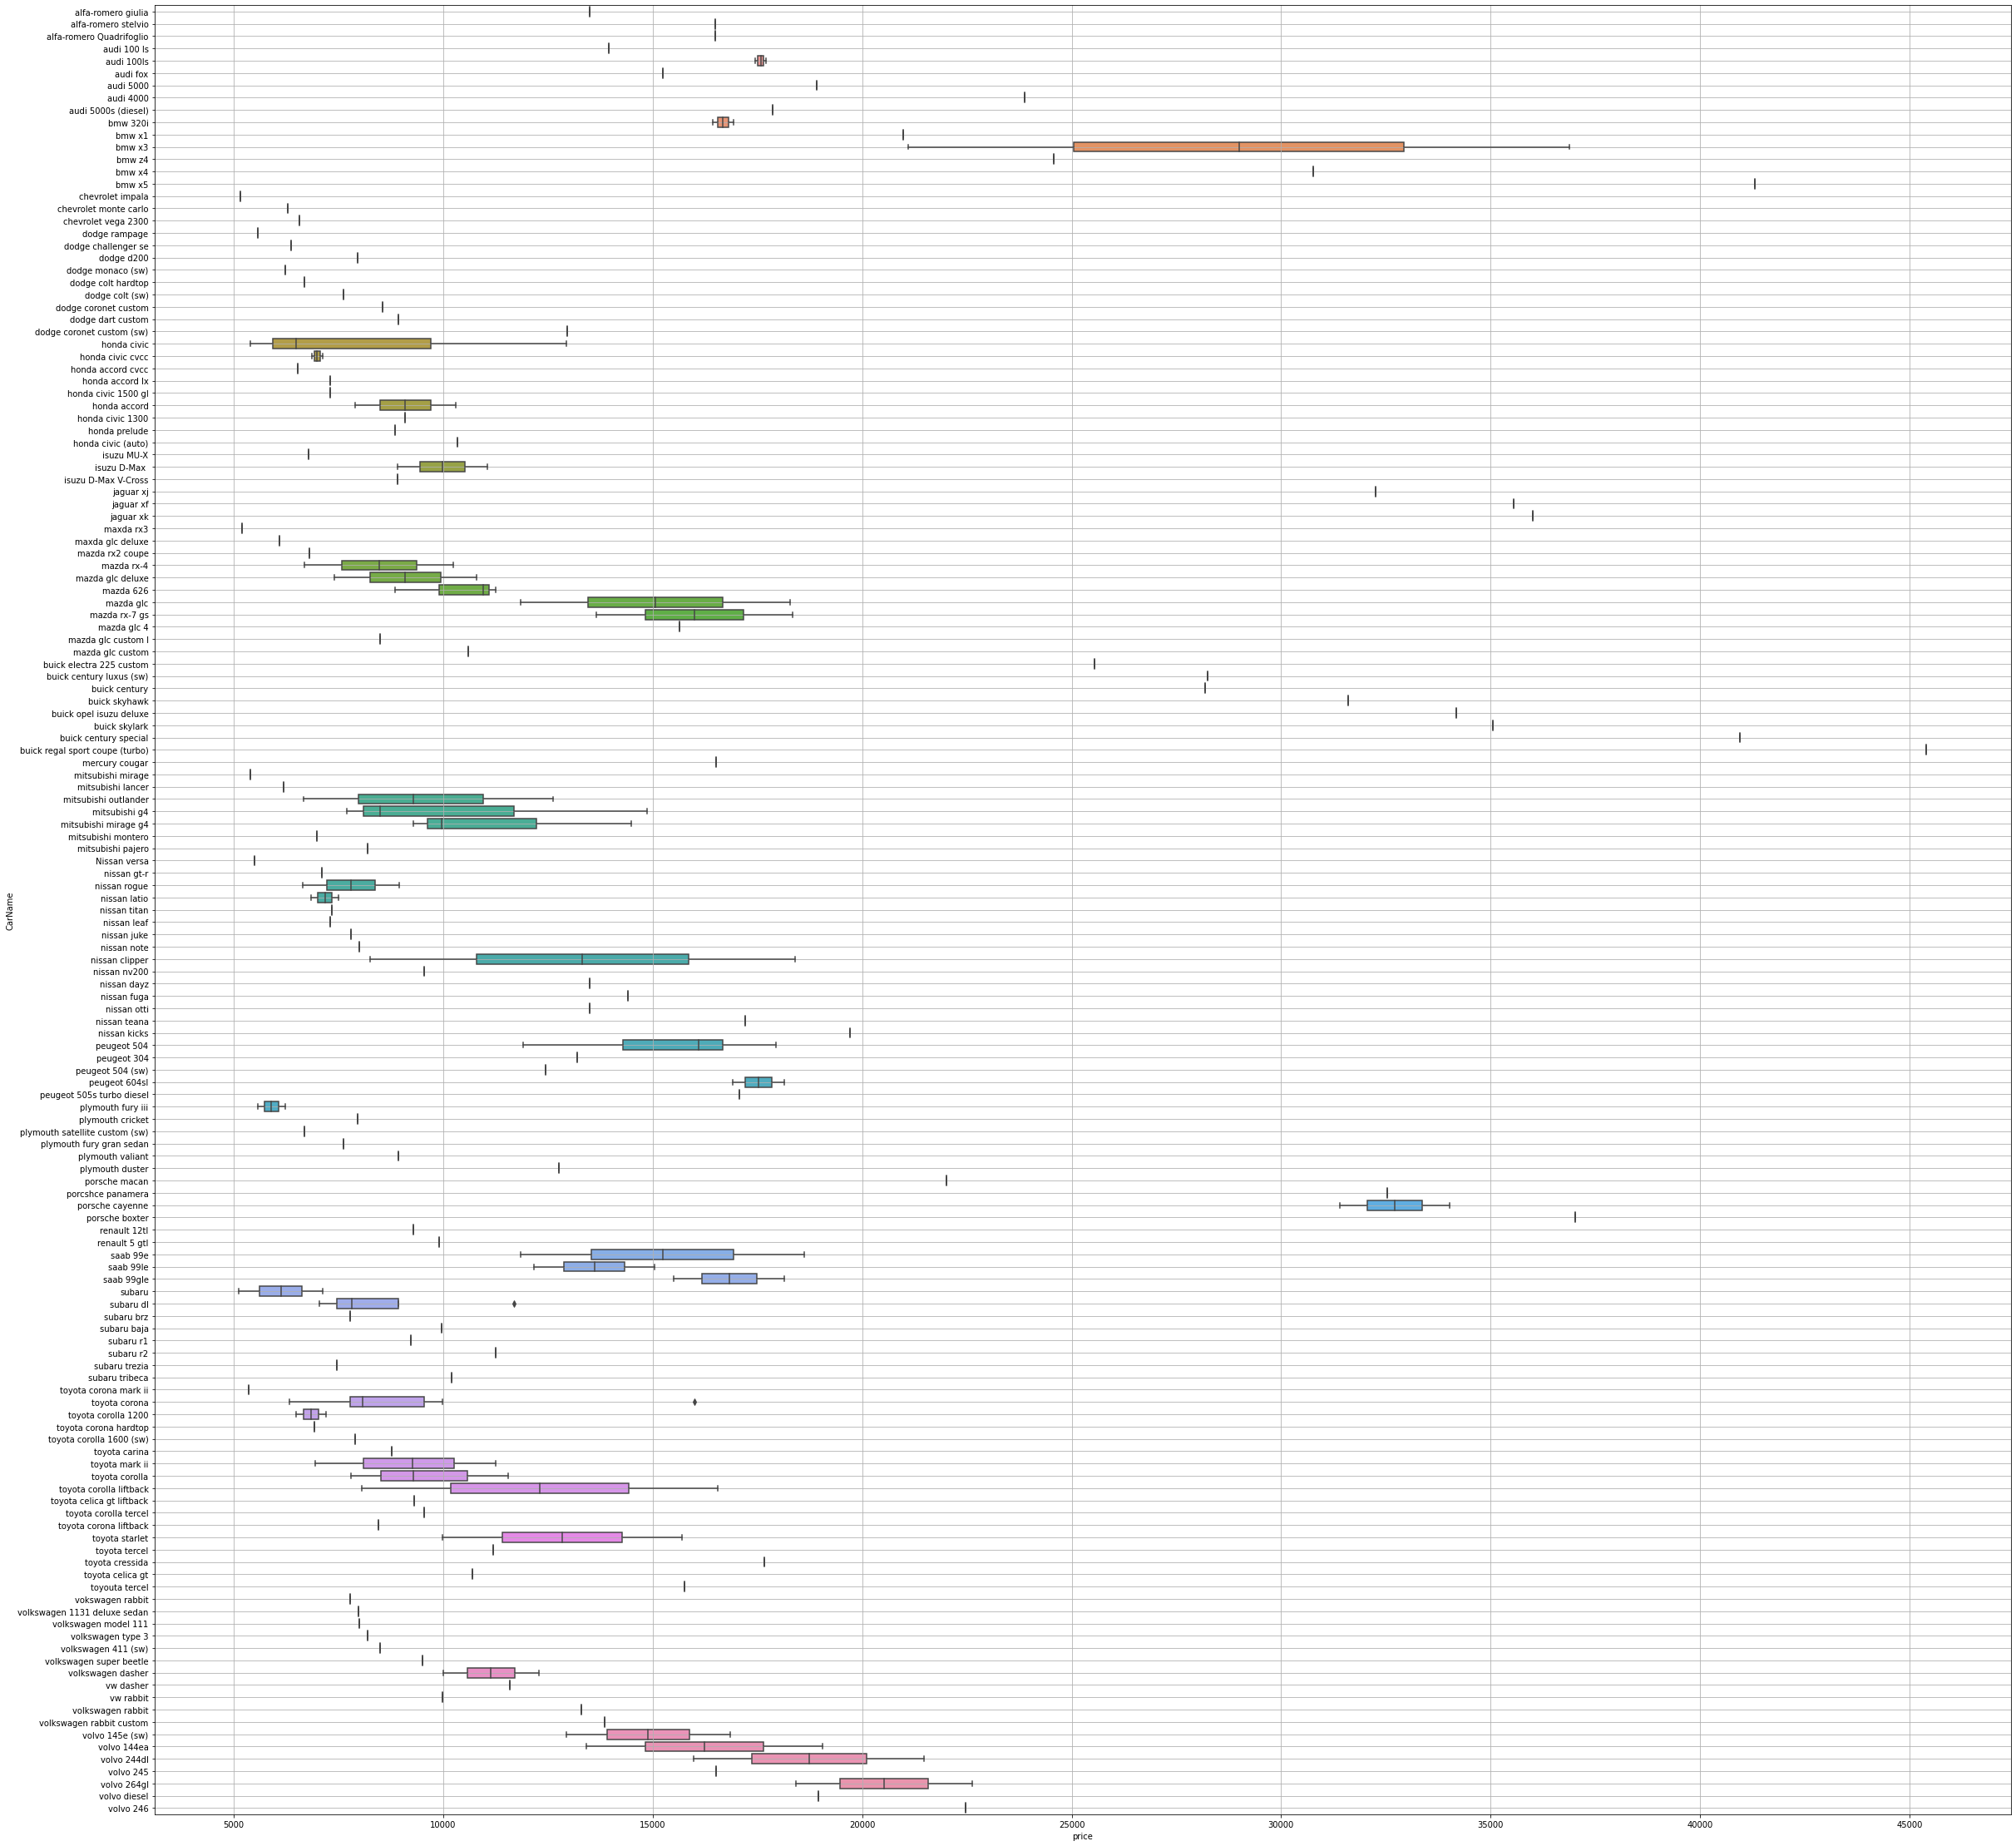

In [14]:
plt.figure(figsize=(40,40))
sns.boxplot(data=df,x="price",y="CarName")
plt.grid(True)
plt.show()

In [15]:
df_cat=df.select_dtypes(["object"])
df_num=df.select_dtypes(["float64","int64"])

In [16]:
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [17]:
df_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']]=oe.fit_transform(df_cat)

In [19]:
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,1.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0
3,4.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0
4,5.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0


In [20]:
oe.categories_

[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
        'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
        'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
        'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century',
        'buick century luxus (sw)', 'buick century special',
        'buick electra 225 custom', 'buick opel isuzu deluxe',
        'buick regal sport coupe (turbo)', 'buick skyhawk',
        'buick skylark', 'chevrolet impala', 'chevrolet monte carlo',
        'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)',
        'dodge colt hardtop', 'dodge coronet custom',
        'dodge coronet custom (sw)', 'dodge d200', 'dodge dart custom',
        'dodge monaco (sw)', 'dodge rampage', 'honda accord',
        'honda accord cvcc', 'honda accord lx', 'honda civic',
        'honda civic (auto)', 'honda civic 1300', 'honda civic 1500 gl',
        'honda civic cvcc', 'honda prelude', 'isuzu D-Max '

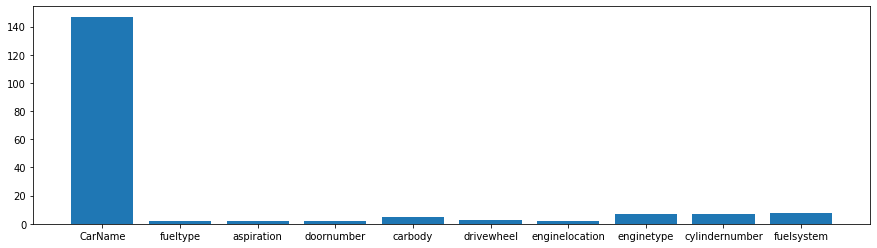

In [21]:
plt.figure(figsize=(15,4))
plt.bar(df_cat.columns,df_cat.nunique())
plt.show()

In [22]:
df_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
from scipy.stats import skew

symboling
Skewness: 0.20952469094997359


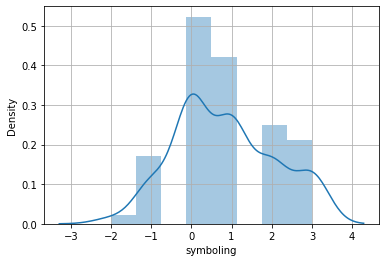

wheelbase
Skewness: 1.042513612401581


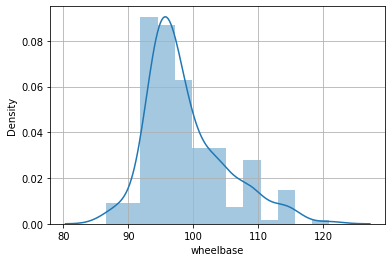

carlength
Skewness: 0.15481031885453517


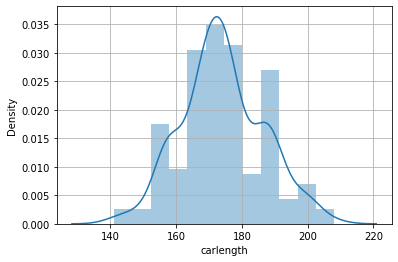

carwidth
Skewness: 0.8973753485201392


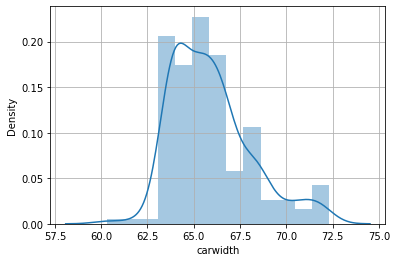

carheight
Skewness: 0.06265991683394276


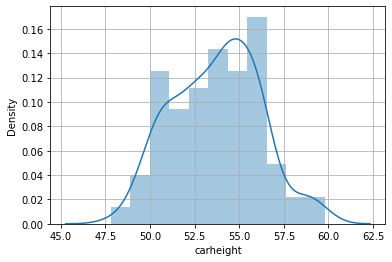

curbweight
Skewness: 0.676402180083416


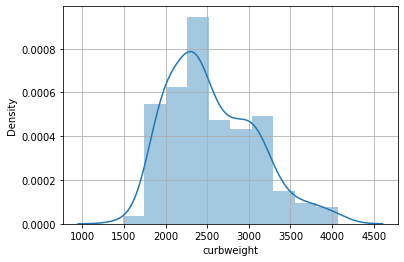

enginesize
Skewness: 1.9333748457840114


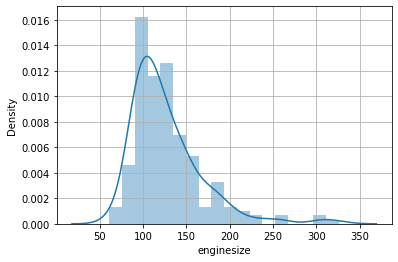

boreratio
Skewness: 0.02000863132222015


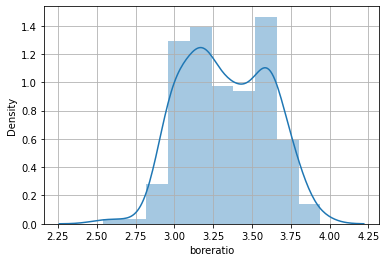

stroke
Skewness: -0.6846476670384662


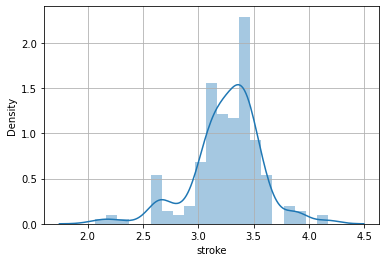

compressionratio
Skewness: 2.5917196238579114


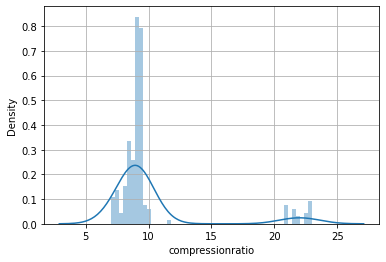

horsepower
Skewness: 1.3950064255509182


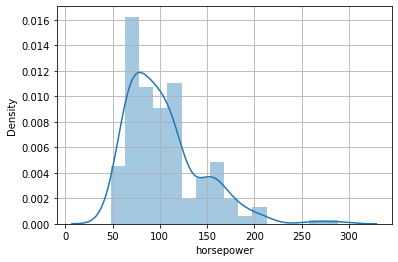

peakrpm
Skewness: 0.07460765890035755


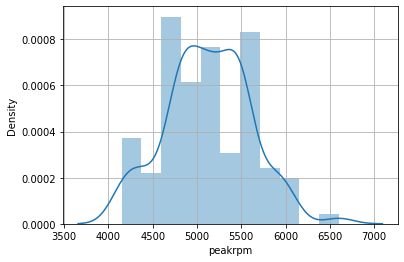

citympg
Skewness: 0.6588377533622138


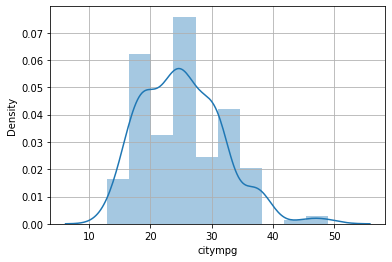

highwaympg
Skewness: 0.5360379305163596


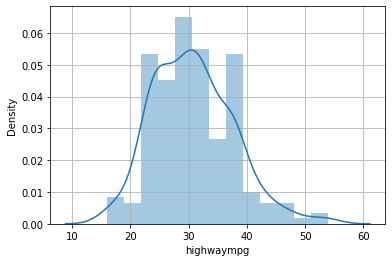

price
Skewness: 1.7646442265113236


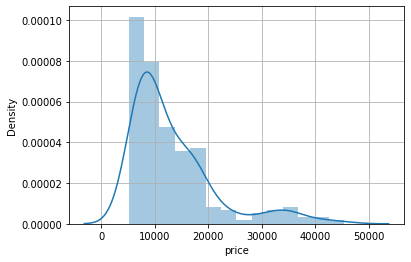

In [24]:
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df_num[col])}")
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.grid(True)
    plt.show()

In [25]:
df_num.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

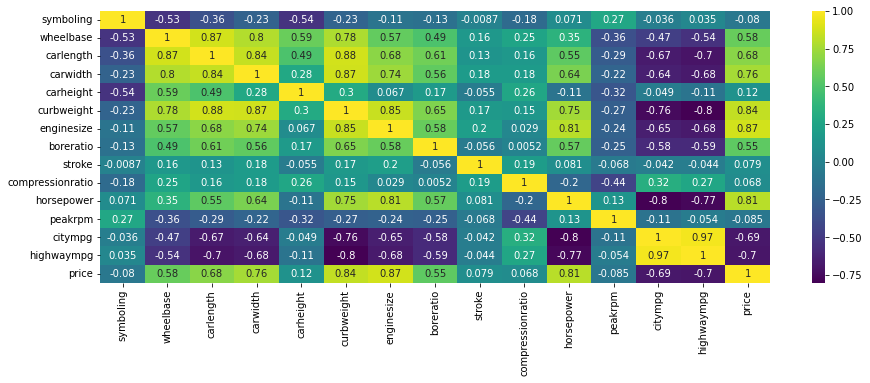

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(df_num.corr(),annot=True,cmap="viridis")
plt.show()

In [27]:
df=pd.concat([df_cat,df_num],axis=1)

In [28]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
x=df.iloc[ : , :-1]
x.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [31]:
y=df.iloc[ : ,-1]
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error as MAE, mean_squared_error as MSE

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [36]:
train=linreg.score(xtrain,ytrain)
test=linreg.score(xtest,ytest)

print(f"Training Accuracy: {train}")
print(f"Testing Accuracy: {test}")

Training Accuracy: 0.9146020792948303
Testing Accuracy: 0.7783558734438691


In [37]:
ypred=linreg.predict(xtest)

In [38]:
linreg.intercept_

13559.098579268299

In [39]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [40]:
m=linreg.coef_

In [41]:
coefdf=pd.DataFrame(m,index=x.columns,columns=["Coefficient"])
coefdf

,Coefficient
CarName,-1210.898889
fueltype,1102.263011
aspiration,234.398362
doornumber,-791.294184
carbody,-788.908819
drivewheel,709.438887
enginelocation,1618.423299
enginetype,171.314574
cylindernumber,-192.418654
fuelsystem,-23.683999


In [42]:
r2_score(ytest,ypred)

0.7783558734438691

In [43]:
MAE(ytest,ypred)

2699.977227997574

In [44]:
MSE(ytest,ypred)

12179461.642990071

In [45]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

3489.908543642666

#### Regularization

In [46]:
from sklearn.linear_model import Lasso, Ridge

###### Lasso-->l1

In [47]:
s=0
for i in range(-50,50):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    ss=l1.score(xtest,ytest)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7962420749379308 44


In [48]:
l1=Lasso(alpha=44)
l1.fit(xtrain,ytrain)

Lasso(alpha=44)

In [49]:
ypred=l1.predict(xtest)
print(f"Accuracy Score: {r2_score(ytest,ypred)}")

Accuracy Score: 0.7962420749379308


In [50]:
train=l1.score(xtrain,ytrain)
test=l1.score(xtest,ytest)

print(f"Training Accuracy: {train}")
print(f"Testing Accuracy: {test}")

Training Accuracy: 0.9118970499775302
Testing Accuracy: 0.7962420749379308


In [51]:
MAE(ytest,ypred)

2580.6278061254848

In [52]:
MSE(ytest,ypred)

11196605.438223703

In [53]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

3346.132908033347

###### Ridge --> l2

In [54]:
s=0
for i in range(-50,50):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    ss=l2.score(xtest,ytest)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7908061261288462 12


In [55]:
l2=Ridge(alpha=12)
l2.fit(xtrain,ytrain)

Ridge(alpha=12)

In [56]:
ypred=l2.predict(xtest)
print(f"Accuracy Score: {r2_score(ytest,ypred)}")

Accuracy Score: 0.7908061261288462


In [57]:
train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)

print(f"Training Accuracy: {train}")
print(f"Testing Accuracy: {test}")

Training Accuracy: 0.9112077423769649
Testing Accuracy: 0.7908061261288462


In [58]:
MAE(ytest,ypred)

2598.3023630549415

In [59]:
MSE(ytest,ypred)

11495313.692045793

In [60]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

3390.4739627441168

#### Cross Validation Score

In [61]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(linreg,x,y,cv=5)
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [ 0.681128    0.88899792 -0.14434333  0.46069845  0.49804215]
CVS Mean: 0.4769046365627608
CVS Standard Deviation: 0.34588626023963054


#### Bagging 

In [62]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(linreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [63]:
r2_score(ytest,ypred)

0.7726031202041307

In [64]:
MAE(ytest,ypred)

2723.0459314686505

In [65]:
MSE(ytest,ypred)

12495578.467350123

In [66]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

3534.908551483351

# Decison Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [68]:
r2_score(ytest,ypred)

0.6392872085911265

In [69]:
MAE(ytest,ypred)

3138.215463414634

In [70]:
MSE(ytest,ypred)

19821358.117458

In [71]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

4452.118385382177

#### Hyper-Parameter Tuning

In [72]:
s=0
for i in range(1,50):
    dt=DecisionTreeRegressor(criterion="mse",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=r2_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8000483691119293 3


In [73]:
s=0
for i in range(1,50):
    dt=DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=r2_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.7969465131239022 13


In [74]:
s=0
for i in range(1,50):
    dt=DecisionTreeRegressor(criterion="mae",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=r2_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)
h=a

0.8724438943590032 27


In [75]:
s=0
for i in range(1,50):
    dt=DecisionTreeRegressor(criterion="mae",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=r2_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8509130563663737 1


In [76]:
dt=DecisionTreeRegressor(criterion="mae",max_depth=h)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [77]:
r2_score(ytest,ypred)

0.8497988758879143

In [78]:
MAE(ytest,ypred)

2243.3536585365855

In [79]:
MSE(ytest,ypred)

8253630.981707317

In [80]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

2872.9133265219325

#### Cross Validation Score

In [81]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5)
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [ 0.75186362  0.8449193  -1.67773747  0.90386352  0.10954315]
CVS Mean: 0.18649042322658665
CVS Standard Deviation: 0.9745836171815022


#### Bagging

In [82]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [83]:
r2_score(ytest,ypred)

0.853926131443922

In [84]:
MAE(ytest,ypred)

2325.197565853659

In [85]:
MSE(ytest,ypred)

8026836.112308945

In [86]:
rmse=np.sqrt(MSE(ytest,ypred))
rmse

2833.167152200686

# Random Forest Regressor 

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [88]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8677333801430254
MSE: 7268120.514747796
MAE: 2128.379310975609
RMSE: 2695.9451987656935


#### Cross Validation Score

In [89]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5)
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [ 0.85870119  0.89881715 -1.20274071  0.91746592  0.73510686]
CVS Mean: 0.4414700810823337
CVS Standard Deviation: 0.8245570751597399


# Support Vector Regressor

In [90]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf")
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [91]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: -0.024759166667661647
MSE: 56311056.63686725
MAE: 5011.779508477165
RMSE: 7504.0693384901


In [92]:
svr=SVR(kernel="linear")
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [93]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.18876576686786584
MSE: 44577748.93218795
MAE: 4280.759792938533
RMSE: 6676.6570177138765


In [94]:
svr=SVR(kernel="poly")
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [95]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: -0.019344259065109615
MSE: 56013504.608440645
MAE: 5001.2351385011525
RMSE: 7484.217033761157


In [96]:
svr=SVR(kernel="sigmoid")
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [97]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: -0.01917148703959337
MSE: 56004010.694523536
MAE: 4997.000765047121
RMSE: 7483.582744549802


#### Hyper-Parameter Tuning

In [98]:
params={
    "C":np.logspace(-3,3,7),
    "gamma": np.logspace(-3,3,7),
    "kernel":["linear"]
}

In [99]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svr,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.092 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.130 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.092 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.163 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.066 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.01, kernel=linear;, score=-0.092 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.01, kernel=linear;, score=-0.130 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.01, kernel=linear;, score=-0.092 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.01, kernel=linear;, score=-0.163 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.01, kernel=linear;, score=-0.066 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.1, kernel=linear;, score=-0.092 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.1,

GridSearchCV(estimator=SVR(kernel='sigmoid'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear']},
             verbose=3)

In [100]:
grid.best_score_

0.8666227838973004

In [101]:
grid.best_params_

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'linear'}

In [102]:
grid.best_estimator_

SVR(C=1000.0, gamma=0.001, kernel='linear')

In [103]:
svr=SVR(C=1000.0, gamma=0.001, kernel='linear')
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [104]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.7623485916912998
MSE: 13059070.217073265
MAE: 2829.487865265236
RMSE: 3613.733556458371


#### Cross Validation Score

In [105]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(SVR(kernel="linear"),x,y,cv=5)
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.77220339 0.70740323 0.09796151 0.60254212 0.5161171 ]
CVS Mean: 0.5392454687382431
CVS Standard Deviation: 0.2374107599537525


#### Bagging

In [106]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(svr)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [107]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.7865245225597541
MSE: 11730590.066161843
MAE: 2583.427895814466
RMSE: 3424.994900165815


# KNR

In [108]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(xtrain,ytrain)
ypred=knr.predict(xtest)

In [109]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.7829360656756857
MSE: 11927777.664390244
MAE: 1869.9219512195123
RMSE: 3453.661486653005


#### Hyper-Parameter Tuning

In [110]:
accuracy=[]
for i in range(1,21):
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(xtrain,ytrain)
    ypred=knr.predict(xtest)
    ac=r2_score(ytest,ypred)
    accuracy.append(ac)

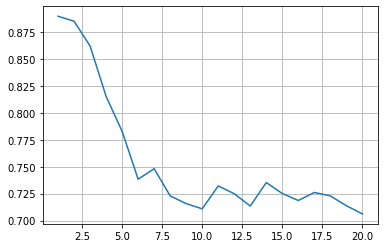

In [111]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [112]:
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(xtrain,ytrain)
ypred=knr.predict(xtest)

In [113]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8623187528212316
MSE: 7565657.141598915
MAE: 1595.711382113821
RMSE: 2750.573965847658


#### Cross Validation Score

In [114]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knr,x,y,cv=5)
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [ 0.52347474  0.43237662 -0.02830163  0.47228939  0.4121271 ]
CVS Mean: 0.3623932430142124
CVS Standard Deviation: 0.19901659637744565


#### Bagging

In [115]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(knr)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [116]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8711396466326432
MSE: 7080944.374776423
MAE: 1540.0849593495934
RMSE: 2661.004392100175


### Voting Regressor

In [117]:
models=[]
models.append(("Linear Regression",LinearRegression()))
models.append(("Decision Tree",DecisionTreeRegressor()))
models.append(("RandomForest",RandomForestRegressor()))
models.append(("Support Vector Regressor",SVR()))
models.append(("KNR",KNeighborsRegressor()))

In [118]:
from sklearn.ensemble import VotingRegressor
vr=VotingRegressor(estimators=models)
vr.fit(xtrain,ytrain)
ypred=vr.predict(xtest)

In [119]:
print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8272356947120748
MSE: 9493489.686491799
MAE: 2103.5572283700985
RMSE: 3081.1507081757295


### Boosting

###### AdaBoostRegressor

In [120]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
ypred=abr.predict(xtest)

print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8024489404044726
MSE: 10855534.9075151
MAE: 2791.9267824921203
RMSE: 3294.77387805523


###### Gradient Boosting Regressor

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)

print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8556959611362127
MSE: 7929583.03736035
MAE: 2205.694829609573
RMSE: 2815.9515332051346


###### XG Boosting

In [122]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(xtrain,ytrain)
ypred=xgbr.predict(xtest)

print(f"R-squared score/accuracy: {r2_score(ytest,ypred)}")
print(f"MSE: {MSE(ytest,ypred)}")
print(f"MAE: {MAE(ytest,ypred)}")
print(f"RMSE: {np.sqrt(MSE(ytest,ypred))}")

R-squared score/accuracy: 0.8757679729936976
MSE: 6826615.400390421
MAE: 2006.7801900724085
RMSE: 2612.7792483082876
